---
# Tutorial Task: Sentiment-Based Quant Strategy
---

In this tutorial, you will design and implement a **quantitative trading strategy** that makes trading decisions based on **news sentiment** for a selected group of 3 stocks.

## Objective

Each day, over a 1-week historical period:
- **Buy** (go long) the stock with the **most positive** news sentiment
- **Sell** (go short) the stock with the **most negative** news sentiment

You will:
1. Select your own **universe of 3 stocks** (e.g., AAPL, BRK-B, DNUT, MSFT, GOOGL, AMZN, TSLA).
2. Use the provided News API to retrieve articles for each stock.
3. Calculate the **average sentiment** for each stock daily using tools like `TextBlob`.
4. Track your portfolio’s value over time by simulating simple returns.
5. Plot your portfolio value and analyze strategy performance.

## Constraints

- The News API is limited to **100 requests per day**. Avoid excessive API calls while developing by storing data or limiting requests.
- You only trade **one long and one short position** per day.
- Keep it simple: assume equal capital allocation to long and short trades.


## Step 1:
Import relevant libraries

In [12]:
# Data analysis
import pandas as pd
import numpy as np

# API calls
import requests

# Sentiment analysis
from textblob import TextBlob

# Time arithmetic
from datetime import datetime, timedelta

# Plotting
import matplotlib.pyplot as plt

# Financial data
import yfinance as yf

## Step 2:
Configure your API

https://newsapi.org/

In [13]:
# Information to call API
API_KEY = '1226552a5e9e4c9aa1b5069d81b21523'  # Replace with your actual key
BASE_URL = 'https://newsapi.org/v2/everything'

## Step 3:
Create a function to get news and calculate the sentiment

In [14]:
# We use TextBlob() to calculate sentiment - show students an example:

print(TextBlob("This stock is amazing!").sentiment.polarity)  # ➝ ~0.8 to 1.0 (positive)
print(TextBlob("This stock is okay.").sentiment.polarity)     # ➝ ~0.2 (slightly positive)
print(TextBlob("This stock is bad.").sentiment.polarity)      # ➝ ~-0.7 (negative)
print(TextBlob("This is a stock.").sentiment.polarity)    

0.7500000000000001
0.5
-0.6999999999999998
0.0


In [15]:
# We make a function to call the API and get the sentiment of a stock over a day
def get_sentiment(stock, date):
    from_date = date.strftime('%Y-%m-%d')
    to_date = (date + timedelta(days=1)).strftime('%Y-%m-%d')

    params = {
        'q': stock,
        'from': from_date,
        'to': to_date,
        'sortBy': 'relevancy',
        'apiKey': API_KEY,
        'language': 'en',
        'pageSize': 5
    }

    # Call API with the relevant stock and dates
    response = requests.get(BASE_URL, params=params)
    data = response.json() # response in a .json format
    
    print(data)

    sentiments = []
    for article in data.get('articles', []):
        title = article.get('title', '')
        description = article.get('description', '')
        
        if not title and not description:
            continue  # skip if both are missing
        
        text = f"{title} {description}"
        # Get sentiment of text
        sentiment = TextBlob(text).sentiment.polarity
        sentiments.append(sentiment)

    if sentiments:
        mean = np.mean(sentiments)
        print(mean)
        return mean # return the mean sentiment of the stock over the day
    return None
    
get_sentiment('AAPL', datetime(2025, 5, 5))


{'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}


## Step 4:
Simulate Trading by Backtesting

In [17]:
def gather_daily_sentiments(stocks, start_date, end_date):
    """
    For each date in [start_date, end_date], calls get_sentiment(stock, date)
    and returns a DataFrame of shape (n_dates × n_stocks) of daily polarity.
    """
    dates = pd.date_range(start_date, end_date)
    # initialize an empty DataFrame
    sentiments = pd.DataFrame(index=dates, columns=stocks, dtype=float)

    for date in dates:
        for stock in stocks:
                sentiments.at[date, stock] = get_sentiment(stock, date)
    return sentiments

def fetch_price_data(stocks, start_date, end_date):
    """
    Downloads daily OHLC data for each ticker in `stocks` between start_date and end_date.
    Returns a dict mapping ticker → its DataFrame.
    """
    price_data = {}
    for stock in stocks:
        df = yf.download(
            stock,
            start=start_date.strftime('%Y-%m-%d'),
            end=(end_date + timedelta(days=1)).strftime('%Y-%m-%d'),
            interval='1d',
            progress=False
        )
        price_data[stock] = df[['Open', 'Close']]  # keep only what is needed
    return price_data

In [18]:
# Define parameters for the API and functions
START_DATE = pd.to_datetime('2025-04-28')
END_DATE   = pd.to_datetime('2025-05-09')
STOCK_UNIVERSE = ['AAPL','DNUT','BRK-B']

# 1) get your sentiment surface
sentiment_df = gather_daily_sentiments(STOCK_UNIVERSE, START_DATE, END_DATE)

# 2) pull in all your price data
price_dict   = fetch_price_data(STOCK_UNIVERSE, START_DATE, END_DATE)

# now students will have have:
# - sentiment_df.loc[date, stock] → polarity of the stock on that date
# - price_dict[stock].loc[date, ['Open','Close']] → prices
    
    
# Import backtesting functionality from python file (students will have this and to save time we will import it). We should run through it at a high level though.
from momentum_functions import backtest_sentiment_strategy
    
    
# Example usage:
results = backtest_sentiment_strategy(sentiment_df, price_dict, init_capital=100000)

{'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}
{'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}
{'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}
{'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours).

/workspaces/FM_momentum/Tutorial/momentum_functions.py:36: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  long_tkr   = scores.idxmax()
/workspaces/FM_momentum/Tutorial/momentum_functions.py:37: FutureWarning: The behavior of Series.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  short_tkr  = scores.idxmin()
/workspaces/FM_momentum/Tutorial/momentum_functions.py:36: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  long_tkr   = scores.idxmax()
/workspaces/FM_momentum/Tutorial/momentum_functions.py:37: FutureWarning: The behavior of Series.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  short_tkr  = scores.idxmin()
/workspaces/FM_momen

## Step 5:
Display results in ```matplotlib```

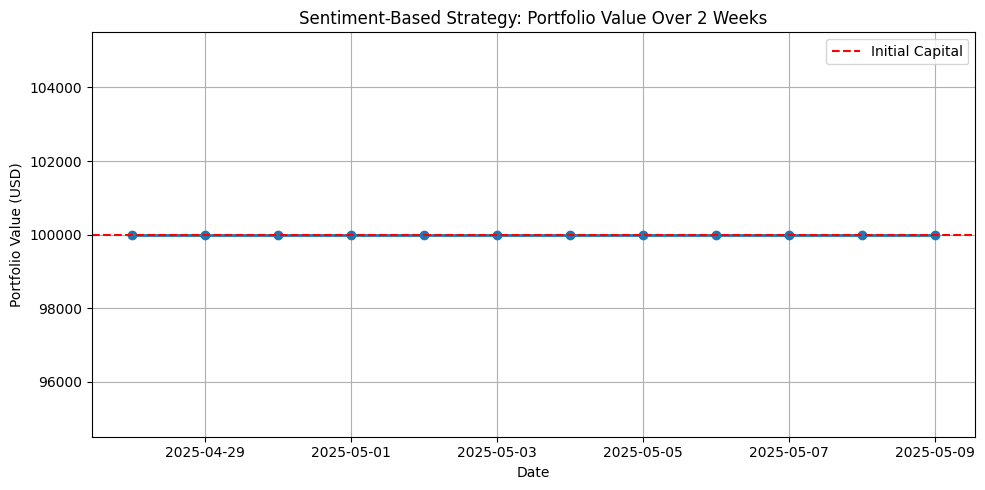

In [19]:
# Plot the portfolio value
plt.figure(figsize=(10, 5))
plt.plot(results.index, results['portfolio_value'], marker='o', linewidth=2)
plt.title('Sentiment-Based Strategy: Portfolio Value Over 2 Weeks')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.axhline(y=100000, color='r', linestyle='--', label='Initial Capital')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()